# Exploring Review Data
- let's look at some typical reviews, how many files there are, what the distributions of review lengths and hours played are, etc.

In [1]:
import os
import sys
from json import loads
from collections import Counter

import numpy as np
import pandas as pd

In [2]:
# So, let's take a look at how many lines are in our reviews files
# Note: I just started processing GTAV after ending all the other processes
os.chdir('..')
! wc -l data/*.jsonlines

     7151 data/Arma_3.jsonlines
     7073 data/Counter_Strike_Global_Offensive.jsonlines
     6040 data/Counter_Strike.jsonlines
     9720 data/Dota_2.jsonlines
     1522 data/Football_Manager_2015.jsonlines
     7151 data/Garrys_Mod.jsonlines
    13349 data/Grand_Theft_Auto_V.jsonlines
        3 data/sample.jsonlines
     7467 data/Sid_Meiers_Civilization_5.jsonlines
     5676 data/Team_Fortress_2.jsonlines
     7165 data/The_Elder_Scrolls_V.jsonlines
     7123 data/Warframe.jsonlines
    79440 total


# Football Manager 2015 Stats

In [3]:
# So, let's first get all of the reviews for the game with the smallest amount of
# review data, i.e., Football Manager 2015 (not including GTAV)
reviews = [loads(review)['review'] for review in open('data/Football_Manager_2015.jsonlines')]

In [4]:
# First of all, how many reviews are there?
print('number of reviews: {}'.format(len(reviews)))

number of reviews: 1522


In [5]:
# Here's a couple reviews from the beginning of the file
reviews[:3]

["ive bought this game for many years and think this might be my last. firstly im not keen on spending 30 a year on something that could be released as an update. the lack of competition in the manager genre has made SI very lazy, to the point where they make one or two small changes and market it as a new game. here are some of the points where my problems lie -ridiculous injurys, in my first season there was not one point where i didnt have at least six players injured -how many times in real football does a team make all its subs then a player gets injured and they finish the game with 10 men? well in FM about one in three games but amazingly never to the computer opponent -its almost impossible to generate any momentum anymore in FM, you will be playing well then suddenly lose for no reason -football has always been in the headlines for footballers astronomical wages, thank god its not like FM, youth players who have never made a first team appearance asking for 40k! agents of aver

# Football Manager 2015: Review Length Distribution

In [6]:
# Let's measure the lengths of each review using a "list comprehension"
lengths = [len(review) for review in reviews]
# Let's print out the first 10 lengths, just to see what we're working with
lengths[:10]

[1669, 3370, 4072, 1126, 60, 3403, 1283, 3104, 1309, 954]

In [7]:
# Compute the average length value
avg_len = sum(lengths)/len(lengths)
print('average length: {}'.format(avg_len))

average length: 410.745729303548


In [8]:
min_len = min(lengths)
print('minimum review length = {}'.format(min_len))

minimum review length = 5


In [9]:
max_len = max(lengths)
print('maximum review length = {}'.format(max_len))

maximum review length = 7653


In [10]:
_lengths = np.array(lengths)

In [11]:
std = _lengths.std()

In [12]:
_lengths.size

1522

In [13]:
bins = std/10.0
_rounded_lengths = np.array([np.ceil(l/bins)*bins for l in lengths])
_rounded_lengths

array([ 1717.88314193,  3435.76628385,  4122.91954062, ...,    68.71532568,
         549.72260542,   343.57662839])

In [14]:
# Let's make bins of size 300
rounded_lengths = [np.ceil(l/60)*60 for l in lengths]
print('original lengths (first 10):          {}\nrounded lengths (to the nearest 300): {}'
      .format(lengths[:10], rounded_lengths[:10]))

original lengths (first 10):          [1669, 3370, 4072, 1126, 60, 3403, 1283, 3104, 1309, 954]
rounded lengths (to the nearest 300): [1680.0, 3420.0, 4080.0, 1140.0, 60.0, 3420.0, 1320.0, 3120.0, 1320.0, 960.0]


In [15]:
# Now, let's make a frequency distribution with the collections.Counter module
rounded_length_fdist = Counter(_rounded_lengths)
rounded_length_fdist

Counter({68.715325677021156: 426,
         137.43065135404231: 273,
         206.14597703106347: 151,
         274.86130270808462: 120,
         343.57662838510578: 74,
         412.29195406212693: 56,
         481.00727973914809: 50,
         549.72260541616924: 47,
         618.4379310931904: 37,
         687.15325677021156: 31,
         755.86858244723271: 35,
         824.58390812425387: 18,
         893.29923380127502: 24,
         962.01455947829618: 12,
         1030.7298851553173: 20,
         1099.4452108323385: 9,
         1168.1605365093596: 16,
         1236.8758621863808: 3,
         1305.591187863402: 8,
         1374.3065135404231: 6,
         1443.0218392174443: 6,
         1511.7371648944654: 12,
         1580.4524905714866: 7,
         1649.1678162485077: 5,
         1717.8831419255289: 13,
         1786.59846760255: 3,
         1855.3137932795712: 3,
         1924.0291189565924: 1,
         1992.7444446336135: 5,
         2061.4597703106347: 3,
         2130.17509598

In [16]:
# It is obvious from looking at the freq. dist. above that length drops off a cliff
# after about 1000 characters
# In fact, for length up to 900, almost 1,050 reviews are accounted for, which means
# that only a little over 100 reviews are thinly-distributed over the remaining area
# above 1,000 characters

In [17]:
# Usually, when you use Pandas, you're using a dataframe, but a dataframe, as I understand
# it, it just made up on a set of "Series"
# Let's make a Series from our rounded lengths and then call its value_counts() method to
# get exactly what collections.Counter was doing (but we'll be able to use it to make a
# nice plot)
rounded_length_series = pd.Series(_rounded_lengths)
rounded_length_series.value_counts()

68.715326      426
137.430651     273
206.145977     151
274.861303     120
343.576628      74
412.291954      56
481.007280      50
549.722605      47
618.437931      37
755.868582      35
687.153257      31
893.299234      24
1030.729885     20
824.583908      18
1168.160537     16
1717.883142     13
962.014559      12
1511.737165     12
1099.445211      9
1305.591188      8
1580.452491      7
1443.021839      6
1374.306514      6
1649.167816      5
1992.744445      5
1786.598468      3
2130.175096      3
2886.043678      3
2405.036399      3
4122.919541      3
2061.459770      3
1855.313793      3
3435.766284      3
2748.613027      3
2267.605747      3
1236.875862      3
5222.364751      2
3779.342912      2
2817.328353      2
2198.890422      2
5703.372031      1
3023.474330      1
2542.467050      1
4329.065518      1
4878.788123      1
7696.116476      1
3298.335632      1
3092.189655      1
3160.904981      1
1924.029119      1
3367.050958      1
4260.350192      1
2954.759004 

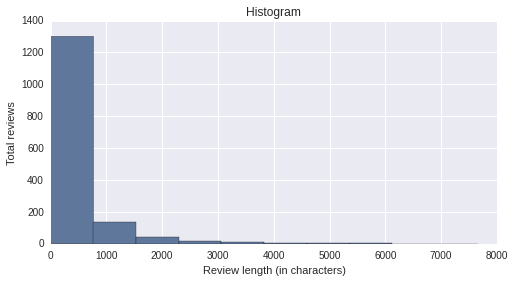

In [18]:
# The table above is nice, but let's do better and try to get a histogram
# Don't worry about all this importing stuff, it's just from something I read in a blog
# post
# Actually, go and check out the blog post here:
# http://nbviewer.ipython.org/github/mwaskom/seaborn/blob/master/examples/plotting_distributions.ipynb
# It's in, you guessed it, an IPython notebook! Shows what you can do with
# matplotlib.
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(pd.Series(lengths), label='Game')
ax.set_xlabel('Review length (in characters)')
ax.set_ylabel('Total reviews')
ax.set_title('Histogram')
fig.savefig('sample_fig')

In [19]:
# That is one nice-looking histogram!
# From it, we can really see just how few reviews there are past 1,000
# For this item, we could probably set the cap at 1,200, let's say
# What do you think?

In [20]:
# If 90% of the reviews have length <= 1200 of the reviews, but not 900,
# let's set MAXLEN to 1200
len([r for r in reviews if len(r) <= 1200])/len(reviews) >= 0.9

True

# Football Manager 2015: Hours Distribution

In [21]:
# Let's do a similar kind of thing for the hours values
hours  = [loads(review)['total_game_hours'] for review in open('data/Football_Manager_2015.jsonlines')]
hours[:10]

[460.5, 197.9, 159.4, 1814.2, 377.0, 422.1, 84.9, 148.7, 789.1, 1263.2]

In [22]:
print("min: {}\nmax: {}".format(min(hours), max(hours)))

min: 0.0
max: 3416.8


In [23]:
rounded_hours = [np.ceil(h/200)*200 for h in hours]

In [24]:
rounded_hours[:10]

[600.0, 200.0, 200.0, 2000.0, 400.0, 600.0, 200.0, 200.0, 800.0, 1400.0]

In [25]:
# Let's use pandas again instead of collections.Counter
rounded_hours_series = pd.Series(rounded_hours)
rounded_hours_series.value_counts()

200     721
400     352
600     166
800     112
1000     59
1200     43
1400     17
1600     14
1800     10
2000      7
2400      4
3000      4
2200      4
2800      3
2600      2
0         2
3600      1
3400      1
dtype: int64

In [26]:
# Hmm, well, would you look at that! The distribution looks exactly the same
# as that for length!

(array([ 723.,  518.,  171.,   60.,   14.,   17.,    8.,    5.,    4.,    2.]),
 array([    0.,   360.,   720.,  1080.,  1440.,  1800.,  2160.,  2520.,
         2880.,  3240.,  3600.]),
 <a list of 10 Patch objects>)

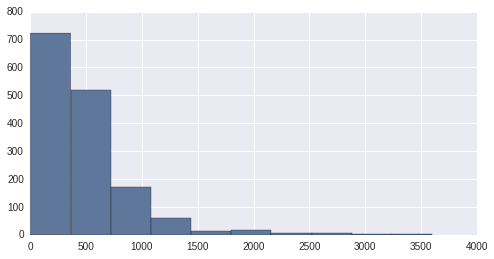

In [27]:
# Let's plot it!
plt.hist(rounded_hours_series)

In [28]:
# If 90% of the reviews have hours values <= 800 of the reviews, but not 600,
# let's set MAXHOURS to 800
len([r for r in hours if float(r) <= 400])/len(hours) >= 0.9

False